In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('zomato.csv', encoding='latin-1')

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
country = pd.read_excel('Country-Code.xlsx')

In [7]:
country.columns

Index(['Country Code', 'Country'], dtype='object')

In [8]:
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [10]:
merged = df.merge(country, on="Country Code")

In [11]:
merged

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [12]:
import seaborn as sns

In [23]:
merged['Votes'].value_counts()

Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
441       1
466       1
745       1
964       1
473       1
Name: count, Length: 1012, dtype: int64

In [27]:
merged['Votes'].quantile(0.90)

np.float64(379.0)

In [35]:
merged.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [46]:
nullCuisines = merged.Cuisines.isnull()

In [52]:
merged[nullCuisines].groupby(['Country']).size()

Country
United States    9
dtype: int64

In [59]:
merged[['Country', 'Average Cost for two']].quantile(q=0.10,numeric_only=True).values

array([100.])

In [60]:
min10PercentValue = merged[['Country', 'Average Cost for two']].quantile(q=0.10,numeric_only=True).values[0]

In [64]:
cheap = merged[merged['Average Cost for two'] <= min10PercentValue].groupby('Country').size()

In [70]:
cheap.values

array([ 23,  32,   4, 363,  35,   5,  13,  28,  23,  76, 434])

In [71]:
cheap.index

Index(['Australia', 'Brazil', 'Canada', 'India', 'New Zealand', 'Qatar',
       'Singapore', 'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

([<matplotlib.patches.Wedge at 0x7e9000be3980>,
 [Text(1.0973256232805055, 0.07665817955084915, 'Australia'),
  Text(1.0693728584915365, 0.257762855201521, 'Brazil'),
  Text(1.0349236452107518, 0.37273723798902936, 'Canada'),
  Text(0.12316092588406337, 1.0930834306380188, 'India'),
  Text(-0.9776727704690973, 0.5041388240190197, 'New Zealand'),
  Text(-1.0314899945946188, 0.38213661307337915, 'Qatar'),
  Text(-1.0508018784350635, 0.32529281006093896, 'Singapore'),
  Text(-1.0830301703789147, 0.19247246569060011, 'Turkey'),
  Text(-1.099752192038686, 0.023347721646994023, 'UAE'),
  Text(-1.057469532782234, -0.3029161389515649, 'United Kingdom'),
  Text(0.27717619643663244, -1.0645061559845117, 'United States')],
 [Text(0.5985412490620939, 0.04181355248228135, '2.22%'),
  Text(0.583294286449929, 0.14059792101901145, '3.09%'),
  Text(0.5645038064785918, 0.2033112207212887, '0.39%'),
  Text(0.06717868684585274, 0.5962273258025557, '35.04%'),
  Text(-0.5332760566195075, 0.2749848131012834,

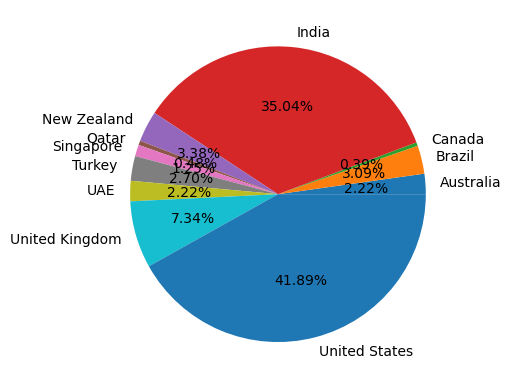

In [73]:
plt.pie(cheap.values, labels=cheap.index, autopct='%1.2f%%')

In [78]:
merged['Switch to order menu'].unique()

array(['No'], dtype=object)

In [79]:
merged.Latitude

0       14.565443
1       14.553708
2       14.581404
3       14.585318
4       14.584450
          ...    
9546    41.022793
9547    41.009847
9548    41.055817
9549    41.057979
9550    40.984776
Name: Latitude, Length: 9551, dtype: float64

In [94]:
merged.Latitude.where(lambda x: abs(x) < 23.5)

0       14.565443
1       14.553708
2       14.581404
3       14.585318
4       14.584450
          ...    
9546          NaN
9547          NaN
9548          NaN
9549          NaN
9550          NaN
Name: Latitude, Length: 9551, dtype: float64

In [89]:
def temperate(x):
    return (abs(x) > 23.5) and (abs(x) < 66.5)

In [ ]:
merged.Latitude.where(temperate).dropna().count()
# you cant do complex booleans with where, instead use indexing for it

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [104]:
merged[(abs(merged.Latitude) > 23.5) & (abs(merged.Latitude) < 66.5)].groupby('Cuisines').size().sort_values(ascending=False)

Cuisines
North Indian                                                                                     865
North Indian, Chinese                                                                            461
Chinese                                                                                          327
Fast Food                                                                                        325
North Indian, Mughlai                                                                            316
                                                                                                ... 
Hyderabadi, Fast Food                                                                              1
Hyderabadi, Biryani, North Indian                                                                  1
Cafe, Bakery, Tea, Vegetarian                                                                      1
Healthy Food, Seafood, Beverages, Belgian, Contemporary, Desserts, Finger Food, In

In [108]:
merged[abs(merged.Latitude) < 23.5].groupby('Cuisines').size().sort_values(ascending=False)

Cuisines
North Indian                                71
North Indian, Chinese                       50
Cafe                                        34
Bakery                                      29
Fast Food                                   29
                                            ..
American, Fast Food, Steak, Beverages        1
American, Fast Food, Salad, Healthy Food     1
American, Fast Food                          1
American, Chinese, North Indian, Italian     1
American, Chinese, North Indian              1
Length: 478, dtype: int64

In [ ]:
merged[abs(merged.Latitude) > 66.5]
# no zomato restaurants in colder areas 😥

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
